In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving COVID-19 Dataset.xlsx to COVID-19 Dataset (1).xlsx
User uploaded file "COVID-19 Dataset (1).xlsx" with length 20747974 bytes


In [ ]:
df = pd.read_excel('COVID-19 Dataset.xlsx')
display(df.head())

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
1,2020-01-04,AZ,Azerbaijan,EUR,NaN,0,NaN,0
2,2020-01-04,BD,Bangladesh,SEAR,0.0,0,0.0,0
3,2020-01-04,BB,Barbados,AMR,NaN,0,NaN,0
4,2020-01-04,BR,Brazil,AMR,NaN,0,NaN,0


In [ ]:
df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
489355,2025-08-03,ML,Mali,AFR,NaN,33197,NaN,743
489356,2025-08-03,MR,Mauritania,AFR,NaN,63891,NaN,997
489357,2025-08-03,MX,Mexico,AMR,NaN,7628380,NaN,335007
489358,2025-08-03,NC,New Caledonia,WPR,NaN,80203,NaN,314
489359,2025-08-03,ME,Montenegro,EUR,NaN,251280,NaN,2654


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489360 entries, 0 to 489359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      489360 non-null  datetime64[ns]
 1   Country_code       487321 non-null  object        
 2   Country            489360 non-null  object        
 3   WHO_region         489360 non-null  object        
 4   New_cases          210338 non-null  float64       
 5   Cumulative_cases   489360 non-null  int64         
 6   New_deaths         153975 non-null  float64       
 7   Cumulative_deaths  489360 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 29.9+ MB


In [ ]:
df.describe()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,489360,2.103380e+05,4.893600e+05,153975.000000,4.893600e+05
mean,2022-10-19 00:00:00,3.701063e+03,2.044598e+06,45.849755,2.167556e+04
min,2020-01-04 00:00:00,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,2021-05-27 00:00:00,3.000000e+00,6.602000e+03,0.000000,4.000000e+01
50%,2022-10-19 00:00:00,6.100000e+01,5.950200e+04,2.000000,6.900000e+02
75%,2024-03-12 00:00:00,6.770000e+02,6.609370e+05,15.000000,7.942000e+03
max,2025-08-03 00:00:00,6.966046e+06,1.034368e+08,11447.000000,1.226130e+06
std,NaN,4.856463e+04,8.522921e+06,215.098404,8.681120e+04


In [ ]:
display(df.isnull().sum())

,0
Date_reported,0
Country_code,2039
Country,0
WHO_region,0
New_cases,279022
Cumulative_cases,0
New_deaths,335385
Cumulative_deaths,0


In [ ]:
display(df.shape)

(489360, 8)

In [ ]:
df.fillna({'New_cases':0,'New_deaths':0},inplace=True)
df.drop(columns=['Country_code'],inplace=True)

In [ ]:
print(f'The Number of Duplicates Row is: {df.duplicated().sum()}')

The Number of Duplicates Row is: 0


In [ ]:
df['New_cases'] = df['New_cases'].clip(lower=0)
df['New_deaths'] = df['New_deaths'].clip(lower=0)

In [ ]:
df['Date_reported']=pd.to_datetime(df['Date_reported'])
df['New_cases']=df['New_cases'].astype('int')
df['New_deaths']=df['New_deaths'].astype('int')

In [ ]:
df[['Country','WHO_region']].nunique()

,0
Country,240
WHO_region,7


In [ ]:
country=df.groupby('Country',as_index=False)[['New_cases','New_deaths']].sum()
region=df.groupby('WHO_region',as_index=False)[['New_cases','New_deaths']].sum()
by_dates=df.groupby('Date_reported',as_index=False)[['New_cases','New_deaths']].sum()

In [ ]:
total_cases = df['New_cases'].sum()
total_deaths = df['New_deaths'].sum()
death_ratio = (total_deaths / total_cases) * 100
print(f"Total COVID-19 case records in the dataset: {total_cases:,}")
print(f"Total COVID-19 death records in the dataset: {total_deaths:,}")
print(f"COVID-19 death ratio: {death_ratio:.2f}%")

Total COVID-19 case records in the dataset: 778,555,963
Total COVID-19 death records in the dataset: 7,066,337
COVID-19 death ratio: 0.91%


In [ ]:
by_dates.loc[by_dates['New_cases'].idxmax()]

,757
Date_reported,2022-01-30 00:00:00
New_cases,8401963
New_deaths,17569


In [ ]:
by_dates.loc[by_dates['New_deaths'].idxmax()]

,386
Date_reported,2021-01-24 00:00:00
New_cases,1155154
New_deaths,27939


In [ ]:
country[country['New_cases']==0][['Country','New_cases']].reset_index(drop=True)

,Country,New_cases
0,Democratic People's Republic of Korea,0
1,Turkmenistan,0


In [ ]:
country[country['New_deaths']==0][['Country','New_deaths']].reset_index(drop=True)

,Country,New_deaths
0,Democratic People's Republic of Korea,0
1,Falkland Islands (Malvinas),0
2,Holy See,0
3,International commercial vessel,0
4,International conveyance (American Samoa),0
5,International conveyance (Kiribati),0
6,International conveyance (Solomon Islands),0
7,International conveyance (Vanuatu),0
8,Niue,0
9,Pitcairn,0


In [ ]:
sns.set_theme(
    style="whitegrid",palette="winter_r",font_scale=1.1)

In [ ]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    return f'{x/1_000_000:.1f}M'

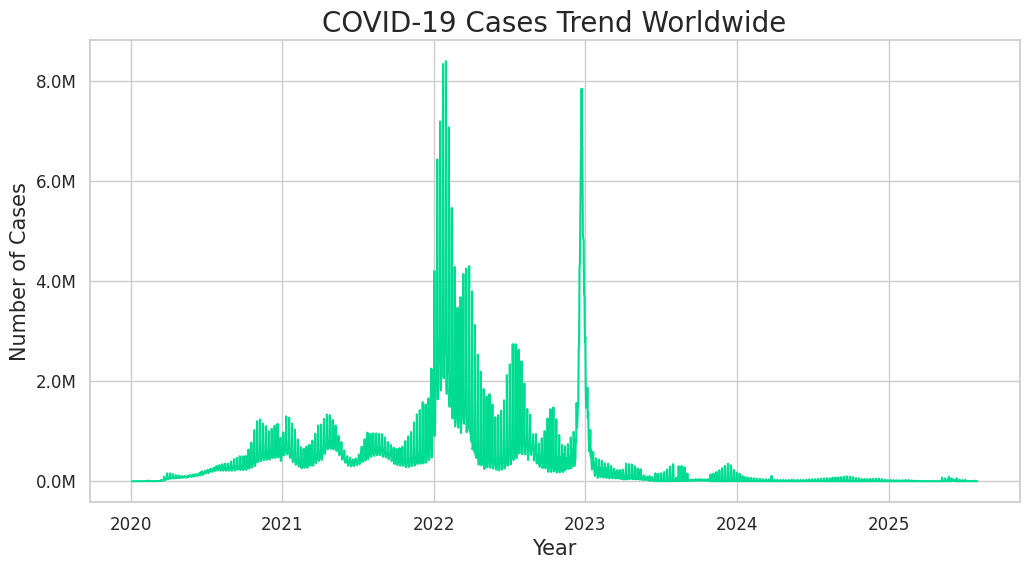

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date_reported',y='New_cases',data=by_dates)
plt.title("COVID-19 Cases Trend Worldwide", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of Cases", fontsize=15)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

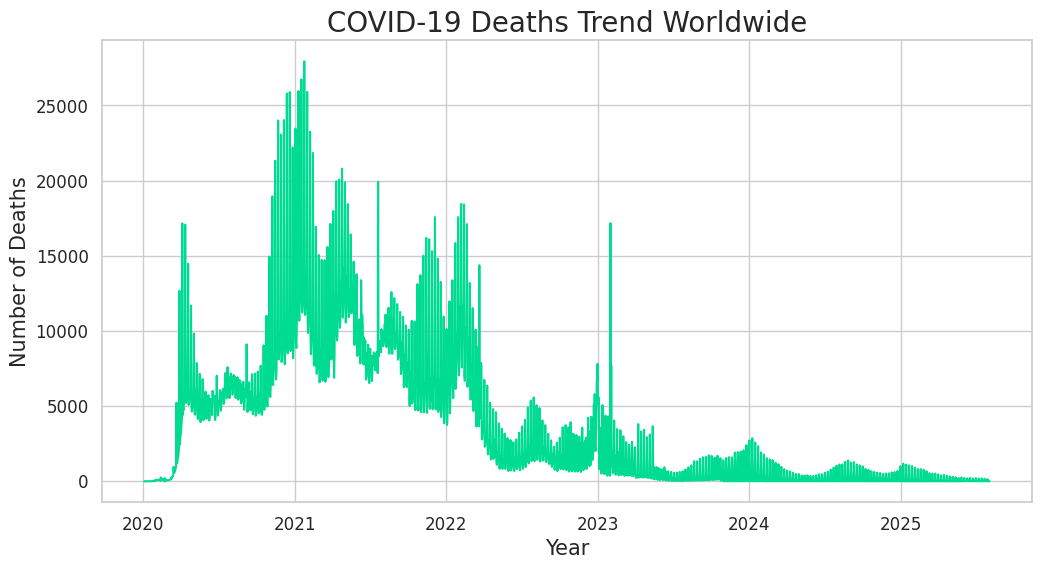

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date_reported',y='New_deaths',data=by_dates)
plt.title('COVID-19 Deaths Trend Worldwide',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Deaths',fontsize=15)
plt.show()

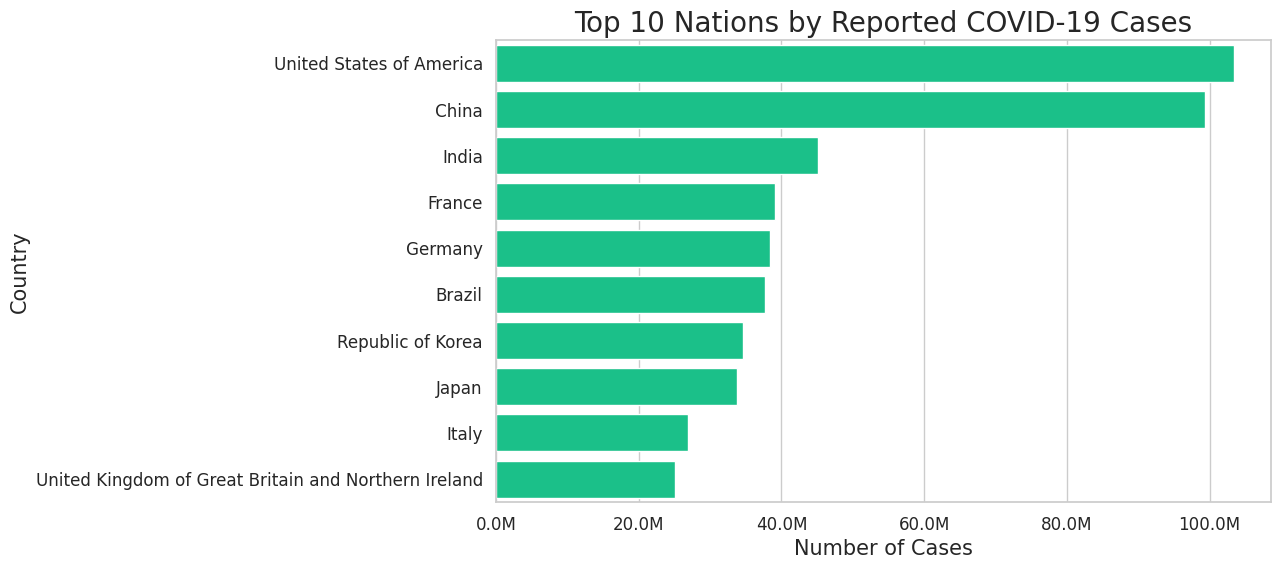

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='New_cases',y='Country',data=country.sort_values(by='New_cases',ascending=False).head(10))
plt.title("Top 10 Nations by Reported COVID-19 Cases", fontsize=20)
plt.xlabel("Number of Cases", fontsize=15)
plt.ylabel("Country", fontsize=15)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

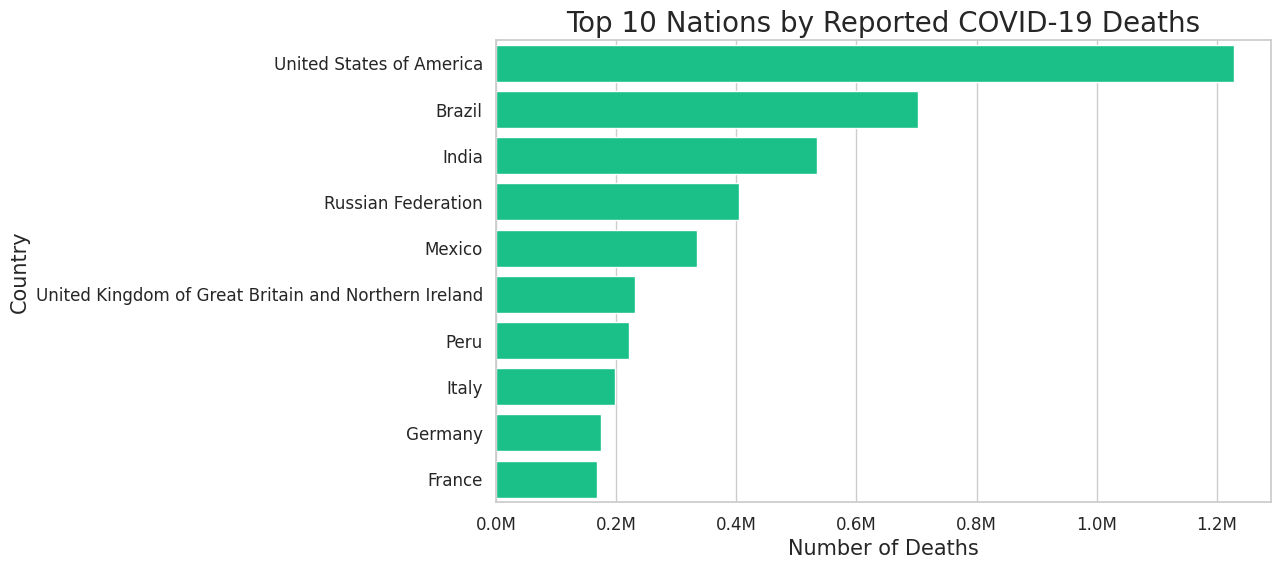

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='New_deaths',y='Country',data=country.sort_values(by='New_deaths',ascending=False).head(10))
plt.title("Top 10 Nations by Reported COVID-19 Deaths", fontsize=20)
plt.xlabel("Number of Deaths", fontsize=15)
plt.ylabel("Country", fontsize=15)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

In [ ]:
ratio_country=country.copy()
ratio_country['death_ratio']=(ratio_country['New_deaths']/ratio_country['New_cases'])*100

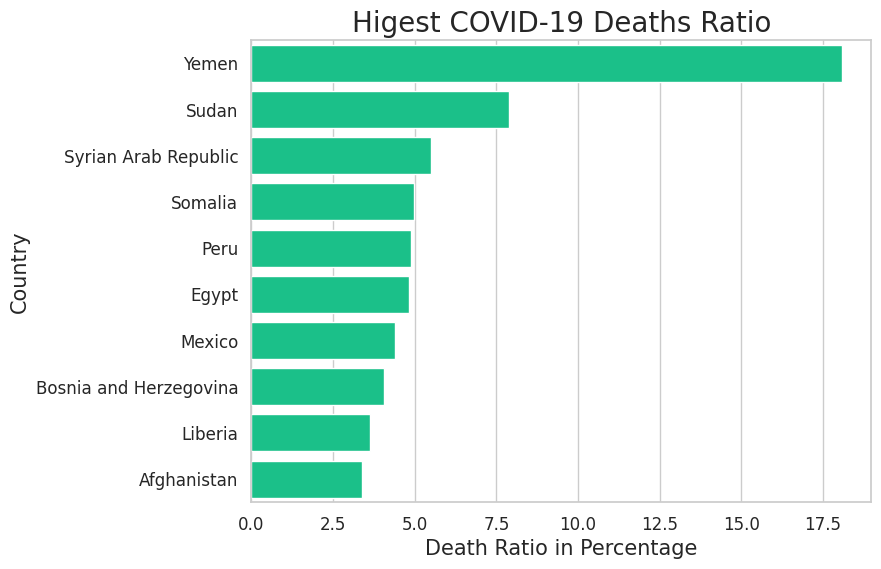

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='death_ratio',y='Country',data=ratio_country.sort_values(by='death_ratio',ascending=False).head(10))
plt.title('Higest COVID-19 Deaths Ratio',fontsize=20)
plt.xlabel('Death Ratio in Percentage',fontsize=15)
plt.ylabel('Country',fontsize=15)
plt.show()

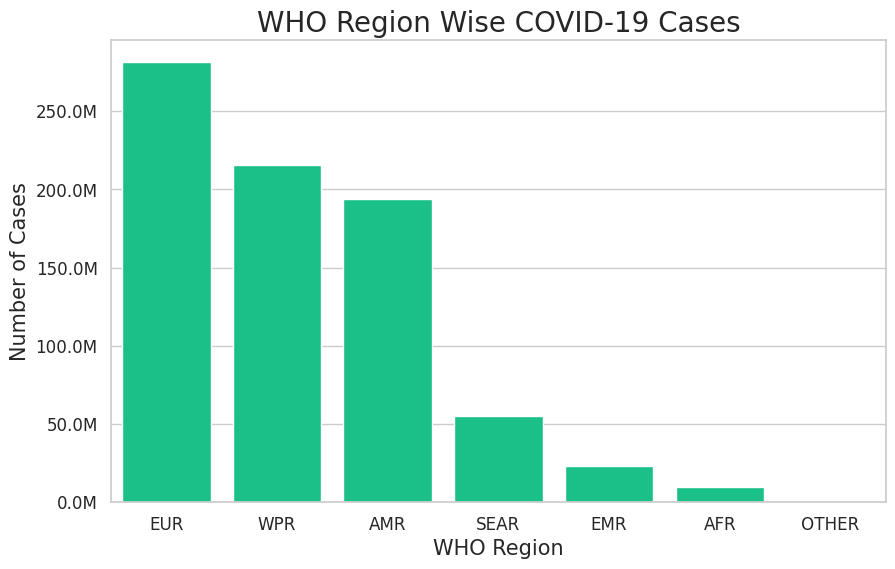

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='WHO_region',y='New_cases',data=region.sort_values(by='New_cases',ascending=False))
plt.title('WHO Region Wise COVID-19 Cases',fontsize=20)
plt.xlabel('WHO Region',fontsize=15)
plt.ylabel('Number of Cases',fontsize=15)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

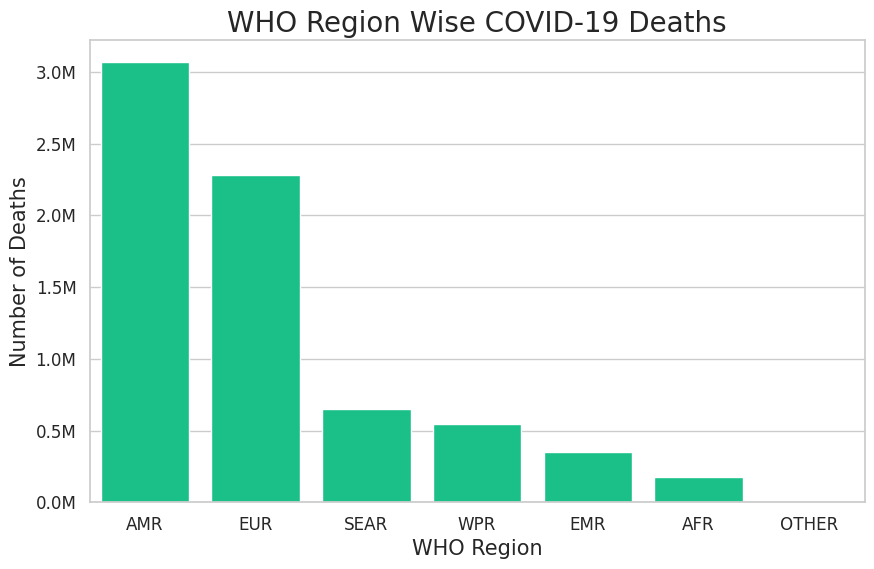

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='WHO_region',y='New_deaths',data=region.sort_values(by='New_deaths',ascending=False))
plt.title('WHO Region Wise COVID-19 Deaths',fontsize=20)
plt.xlabel('WHO Region',fontsize=15)
plt.ylabel('Number of Deaths',fontsize=15)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

In [ ]:
region['death_ratio']=(region['New_deaths']/region['New_cases'])*100

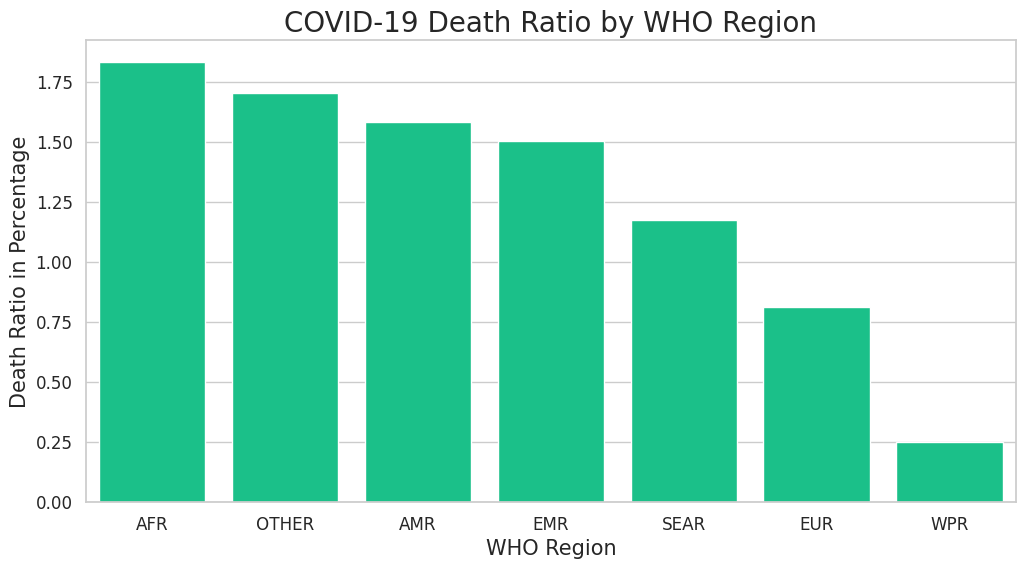

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y='death_ratio', x='WHO_region',data=region.sort_values(by='death_ratio',ascending=False))
plt.title('COVID-19 Death Ratio by WHO Region',fontsize=20)
plt.xlabel('WHO Region',fontsize=15)
plt.ylabel('Death Ratio in Percentage',fontsize=15)
plt.show()

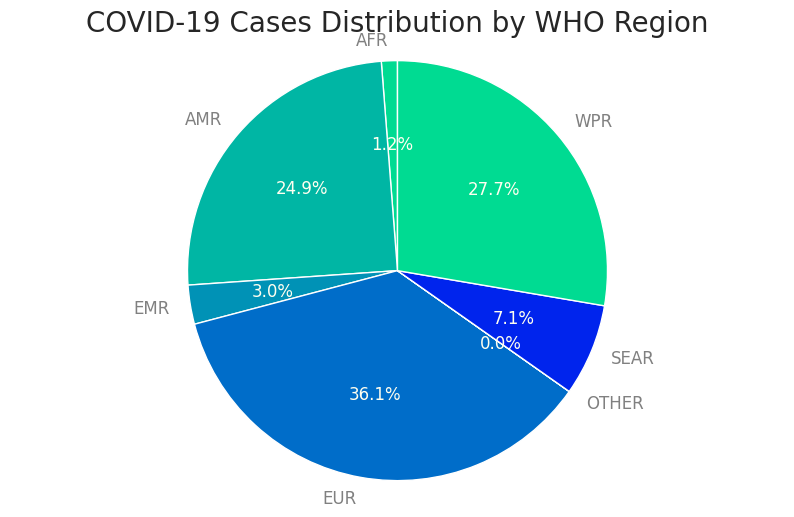

In [ ]:
plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie(region['New_cases'],labels=region['WHO_region'],autopct='%1.1f%%',startangle=90)
plt.setp(texts, color='gray', fontsize=12)
plt.setp(autotexts, color='Ivory', fontsize=12)
plt.title("COVID-19 Cases Distribution by WHO Region",fontsize=20)
plt.axis('equal')
plt.show()

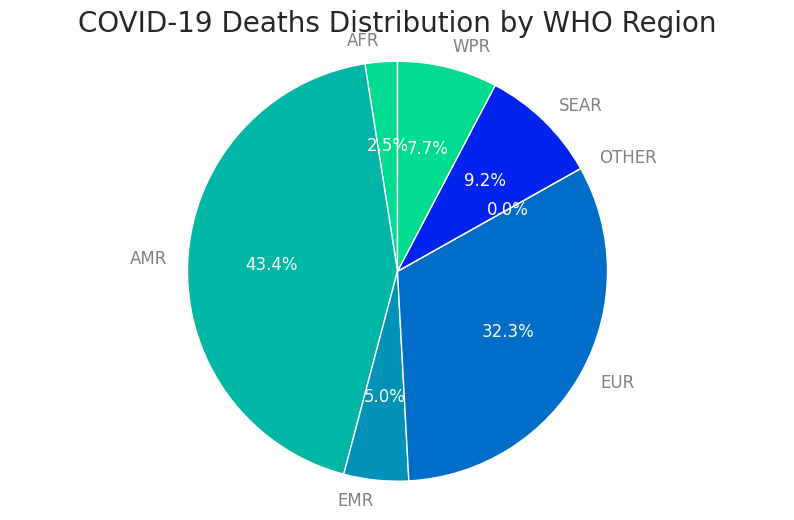

In [ ]:
`plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie(region['New_deaths'],labels=region['WHO_region'],autopct='%1.1f%%',startangle=90)
plt.setp(texts, color='gray', fontsize=12)
plt.setp(autotexts, color='Ivory', fontsize=12)
plt.title("COVID-19 Deaths Distribution by WHO Region",fontsize=20)
plt.axis('equal')
plt.show()